<h1>Análise de sentimento</h1>
<br>
<h2>VADER-Sentiment-Analysis</h2>

Instalando a biblioteca que nos ajudará a interpretar os tweets

<a href='https://github.com/cjhutto/vaderSentiment'> vaderSentiment INFO</a>
<br><br>

<br>

In [1]:
#!pip install vaderSentiment

In [2]:
import pandas as pd
import re
import matplotlib as plt
import seaborn as sns
%matplotlib inline
# Biblioteca de processamento de linguagem natural
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
df_presidenciaveis = pd.read_csv('DF_Presidenciaveis_2022_limpo')
df_presidenciaveis.head()

,Data,Id,Tweet,Candidato,Tweet_limpo
0,2022-08-01 22:56:21+00:00,1554239639266934785,@JoseAloiseBahia @WilmarPetista @augustotomano...,Lula,osealoisebahia ilmarpetista ugustotomanov alag...
1,2022-08-01 22:56:18+00:00,1554239629196394497,"Chega o Natal, mas não chega a eleição. Quem a...",Lula,"chega o natal, mas não chega a eleição. quem a..."
2,2022-08-01 22:56:17+00:00,1554239623374815232,47% lula\n29%bolsonaro https://t.co/h9jUGDadTP,Lula,47% lula29%bolsonaro https://t.co/h9jugdadtp
3,2022-08-01 22:56:13+00:00,1554239607570669569,@PaulettoShirlei @LulaOficial @ricardostuckert...,Lula,aulettoshirlei ulaoficial icardostuckert parec...
4,2022-08-01 22:56:11+00:00,1554239599005818880,@77_frota @jrbozzella Vai votar no Lula também...,Lula,"7_frota rbozzella vai votar no lula também, fr..."


In [4]:
sid = SentimentIntensityAnalyzer()

In [5]:
sentimento_tweet = df_presidenciaveis['Tweet_limpo']

In [6]:
sentimento_tweet = sentimento_tweet.apply(lambda _:sid.polarity_scores(' '.join(re.findall(r'\w+', _.lower()))))

In [7]:
# Dicionário de sentimentos, negativo, neutro, positivo: nota
sentimento_tweet.head()

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.099, 'neu': 0.901, 'pos': 0.0, 'comp...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...
Name: Tweet_limpo, dtype: object

In [8]:
df_presidenciaveis['Negativo'] = sentimento_tweet.apply(lambda _:_['neg'])
df_presidenciaveis['Neutro'] = sentimento_tweet.apply(lambda _:_['neu'])
df_presidenciaveis['Positivo'] = sentimento_tweet.apply(lambda _:_['pos'])
df_presidenciaveis['Composicao'] = sentimento_tweet.apply(lambda _:_['compound'])

In [9]:
df_presidenciaveis.head()

,Data,Id,Tweet,Candidato,Tweet_limpo,Negativo,Neutro,Positivo,Composicao
0,2022-08-01 22:56:21+00:00,1554239639266934785,@JoseAloiseBahia @WilmarPetista @augustotomano...,Lula,osealoisebahia ilmarpetista ugustotomanov alag...,0.000,1.000,0.0,0.000
1,2022-08-01 22:56:18+00:00,1554239629196394497,"Chega o Natal, mas não chega a eleição. Quem a...",Lula,"chega o natal, mas não chega a eleição. quem a...",0.099,0.901,0.0,-0.296
2,2022-08-01 22:56:17+00:00,1554239623374815232,47% lula\n29%bolsonaro https://t.co/h9jUGDadTP,Lula,47% lula29%bolsonaro https://t.co/h9jugdadtp,0.000,1.000,0.0,0.000
3,2022-08-01 22:56:13+00:00,1554239607570669569,@PaulettoShirlei @LulaOficial @ricardostuckert...,Lula,aulettoshirlei ulaoficial icardostuckert parec...,0.000,1.000,0.0,0.000
4,2022-08-01 22:56:11+00:00,1554239599005818880,@77_frota @jrbozzella Vai votar no Lula também...,Lula,"7_frota rbozzella vai votar no lula também, fr...",0.167,0.833,0.0,-0.296


In [10]:
sentimentos = []

In [11]:
for sentimento in df_presidenciaveis['Composicao']:
    if sentimento >= 0.05:
        sentimentos.append('Postivo')
    elif sentimento <= (-0.05):
        sentimentos.append('Negativo')
    else:
        sentimentos.append('Neutro')

In [12]:
print(sentimentos)

['Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Negativo', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Postivo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Postivo', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Postivo', 'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Negativo', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro', 'Neutro'

In [13]:
df_presidenciaveis['Sentimento'] = sentimentos

In [14]:
df_presidenciaveis.head()

,Data,Id,Tweet,Candidato,Tweet_limpo,Negativo,Neutro,Positivo,Composicao,Sentimento
0,2022-08-01 22:56:21+00:00,1554239639266934785,@JoseAloiseBahia @WilmarPetista @augustotomano...,Lula,osealoisebahia ilmarpetista ugustotomanov alag...,0.000,1.000,0.0,0.000,Neutro
1,2022-08-01 22:56:18+00:00,1554239629196394497,"Chega o Natal, mas não chega a eleição. Quem a...",Lula,"chega o natal, mas não chega a eleição. quem a...",0.099,0.901,0.0,-0.296,Negativo
2,2022-08-01 22:56:17+00:00,1554239623374815232,47% lula\n29%bolsonaro https://t.co/h9jUGDadTP,Lula,47% lula29%bolsonaro https://t.co/h9jugdadtp,0.000,1.000,0.0,0.000,Neutro
3,2022-08-01 22:56:13+00:00,1554239607570669569,@PaulettoShirlei @LulaOficial @ricardostuckert...,Lula,aulettoshirlei ulaoficial icardostuckert parec...,0.000,1.000,0.0,0.000,Neutro
4,2022-08-01 22:56:11+00:00,1554239599005818880,@77_frota @jrbozzella Vai votar no Lula também...,Lula,"7_frota rbozzella vai votar no lula também, fr...",0.167,0.833,0.0,-0.296,Negativo


In [15]:
df_presidenciaveis['Sentimento'].value_counts()

Neutro      120
Negativo     26
Postivo       7
Name: Sentimento, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sentimento'>

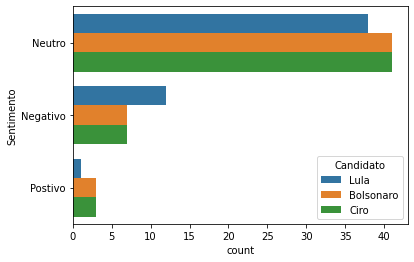

In [26]:
sns.countplot(data=df_presidenciaveis, y='Sentimento', hue='Candidato')

<AxesSubplot:xlabel='count', ylabel='Sentimento'>

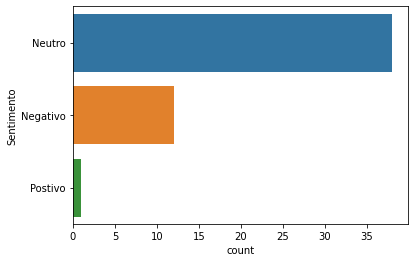

In [16]:
filtro_lula = df_presidenciaveis[df_presidenciaveis['Candidato'] == 'Lula']
sns.countplot(data=filtro_lula, y='Sentimento')

<AxesSubplot:xlabel='count', ylabel='Sentimento'>

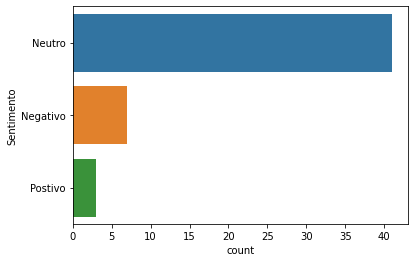

In [18]:
filtro_bolsonaro = df_presidenciaveis[df_presidenciaveis['Candidato'] == 'Bolsonaro']
sns.countplot(data=filtro_bolsonaro, y='Sentimento')

<AxesSubplot:xlabel='count', ylabel='Sentimento'>

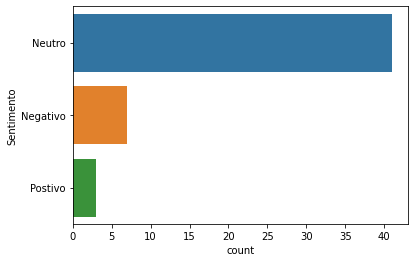

In [19]:
filtro_ciro = df_presidenciaveis[df_presidenciaveis['Candidato'] == 'Ciro']
sns.countplot(data=filtro_ciro, y='Sentimento')

In [28]:
df_presidenciaveis.to_csv('df_precidenciaveis_sentimentos.csv', sep=',', index=False)